Please note that the following code is taken from the book "Deep Learning With Python (2nd ed.)" without modifications to accommodate the lectures on "Introduction to Machine Learning", which is a part of the course CSI4106 "Introduction to Artificial Intelligence" taught in Winter 2022.

Chollet, F. (2021). Deep Learning With Python (2nd ed.). Manning Publications.

Please do not redistribute the code.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist.load_data()
print(train_imgs.shape)
print(test_imgs.shape)
print(len(train_lbls))
print(type(train_imgs))
print(type(train_lbls))

(60000, 28, 28)
(10000, 28, 28)
60000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

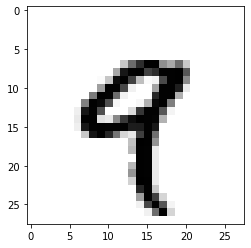

In [6]:
# how to view the images
# accessing an element in the tensor
image = train_imgs[4]
print(image)
plt.imshow(image, cmap=plt.cm.binary)

In [3]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

2022-02-13 21:58:44.201729: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-13 21:58:44.202007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-13 21:58:44.203946: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# for image data, need to transform the data so that the model can understand
train_imgs = train_imgs.reshape((60000, 28 * 28))
train_imgs = train_imgs.astype("float32") / 255
test_imgs = test_imgs.reshape((10000, 28 * 28))
test_images = test_imgs.astype("float32") / 255


In [5]:
# train the model
model.fit(train_imgs, train_lbls, epochs=5, batch_size=128)

2022-02-13 21:58:44.565777: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-13 21:58:44.585530: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3393230000 Hz


Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4234 - accuracy: 0.8780
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1072 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0683 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0481 - accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0352 - accuracy: 0.9891


In [6]:
# prediction on the test data
test_loss, test_acc = model.evaluate(test_imgs, test_lbls)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 12.4209 - accuracy: 0.9795
12.420865058898926
0.9794999957084656
